In [1]:
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

In [2]:
qr = QuantumRegister(10)
cr = ClassicalRegister(10)
qc = QuantumCircuit(qr, cr)

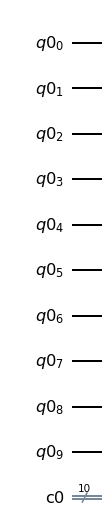

In [3]:
%matplotlib inline
qc.draw(output='mpl')

In [4]:
def make_entanglement(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [5]:
def make_communicate(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

In [6]:
def measure_pair(qc, a, b):
    qc.measure(a, a)
    qc.measure(b, b)

In [7]:
for qubit in range(5):
    make_entanglement(qc, qubit*2, qubit*2 + 1)

In [8]:
qc.barrier()
for qubit in range(1,8,2):
    make_communicate(qc, qubit, qubit+1)

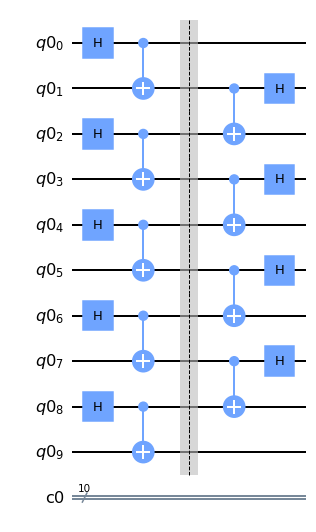

In [9]:
qc.draw(output='mpl')

In [10]:
qc.barrier()
for qubit in range(1,8,2):
    qc.cz(qubit, 0)
    qc.cx(qubit+1, 9)

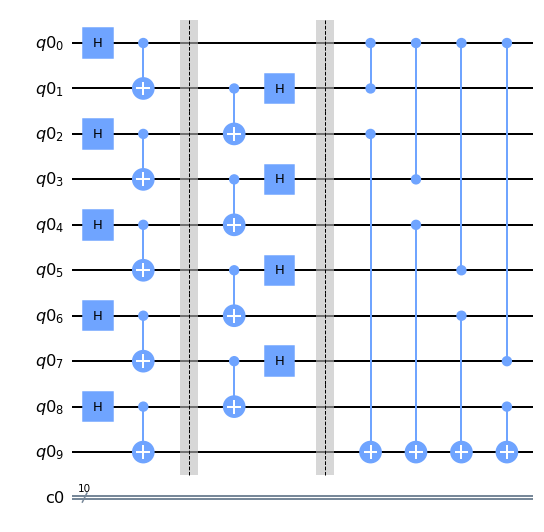

In [11]:
qc.draw(output='mpl')

In [12]:
qc.barrier()
measure_pair(qc, 0, 9)

In [15]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("oA1RA2hIZo6QtKQ3kw43BeGFf4GMfiGA")
qpu_backend = provider.get_backend("ionq_qpu")
qpu_job = qpu_backend.run(qc, shots=1024)

from qiskit.providers.jobstatus import JobStatus
import time
while qpu_job.status() is not JobStatus.DONE:
    print("Job Status is ", qpu_job.status) 
    time.sleep(60)

print("FInally", qpu_job.status() )
print(qpu_job.get_counts())
print(qpu_job.get_probabilities())



Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000002CAA1D729A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000002CAA1D729A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000002CAA1D729A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000002CAA1D729A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000002CAA1D729A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000002CAA1D729A0>>
FInally JobStatus.DONE
{'0000000000': 431, '0000000001': 93, '1000000000': 99, '1000000001': 412}
{'0000000000': 0.4209000000000006, '0000000001': 0.09050000000000005, '1000000000': 0.09690000000000007, '1000000001': 0.4027000000000004}


In [16]:
counts = qpu_job.get_counts(qc)
print(f"The experimental error rate : {(1 - (counts['0000000000'] + counts['1000000001'])/sum(counts.values())) * 100 :.3f}%")

The experimental error rate : 18.551%
